In [1]:
import sys
sys.path.append('./../features/')

import utils
import nrrd

from vis_stack import show_stack

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
ct_image1, _ = nrrd.read('./../../../data_source/images/ct_nrrd/P038CT.nrrd')
ct_mask1, _ = nrrd.read('./../../../data_source/images/masks_nrrd/P038mask.nrrd')

ct_image2, _ = nrrd.read('./../../../data_source/images/ct_nrrd/P058CT.nrrd')
ct_mask2, _ = nrrd.read('./../../../data_source/images/masks_nrrd/P058mask.nrrd')

image_idx2 = 70
masked2 = ct_image2[:, :, image2_idx] * ct_mask2[:, :, image2_idx]

# Crop to tumor mask

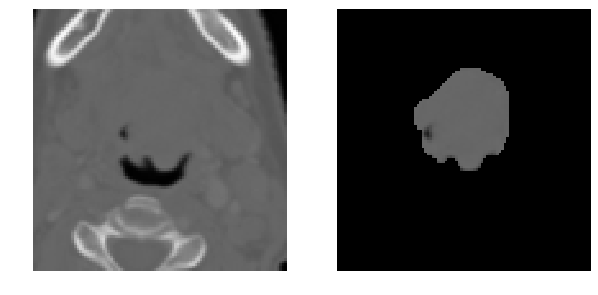

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
#axes[0, 0].imshow(ct_image1[:, :, 89], cmap=plt.cm.gray)
#axes[0, 1].imshow(ct_image1[:, :, 89] * ct_mask1[:, :, 89], cmap=plt.cm.gray)

image2_idx = 50
axes[0].imshow(
    ct_image2[:, :, image2_idx], 
    cmap=plt.cm.gray,
    vmin=np.min(ct_image2[:, :, image2_idx]),
    vmax=np.max(ct_image2[:, :, image2_idx])
)
axes[1].imshow(
    masked2, 
    cmap=plt.cm.gray, 
    vmin=np.min(ct_image2[:, :, image2_idx]),
    vmax=np.max(ct_image2[:, :, image2_idx])
)
for axis in axes.ravel():
    axis.axis('off')
    
plt.savefig(
    './../../../../ct_tumor_samples.png',
    #'./../../../../ct_cropped_tumor_samples.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [7]:
pet_image1, _ = nrrd.read('./../../../data_source/images/pet_nrrd/P038PET.nrrd')
pet_mask1, _ = nrrd.read('./../../../data_source/images/masks_nrrd/P038mask.nrrd')

pet_image2, _ = nrrd.read('./../../../data_source/images/pet_nrrd/P253PET.nrrd')
pet_mask2, _ = nrrd.read('./../../../data_source/images/masks_nrrd/P253mask.nrrd')

"plt.savefig(\n    #'./../../../../pet_tumor_samples.png',\n    #'./../../../../pet_cropped_tumor_samples.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=600, \n)"

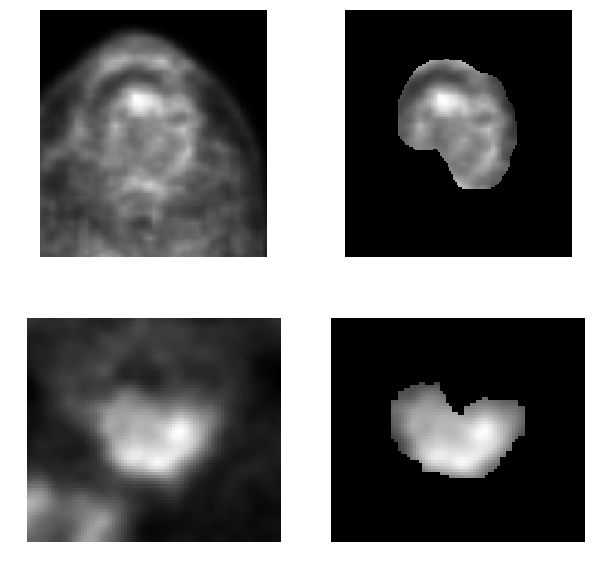

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0, 0].imshow(pet_image1[:, :, 89], cmap=plt.cm.gray)
axes[0, 1].imshow(pet_image1[:, :, 89] * pet_mask1[:, :, 89], cmap=plt.cm.gray)

axes[1, 0].imshow(pet_image2[40, :, :], cmap=plt.cm.gray)
axes[1, 1].imshow(pet_image2[40, :, :] * pet_mask2[40, :, :], cmap=plt.cm.gray)

for axis in axes.ravel():
    axis.axis('off')
    
"""plt.savefig(
    #'./../../../../pet_tumor_samples.png',
    #'./../../../../pet_cropped_tumor_samples.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)"""

# Z-scoring

In [9]:
pet_stdev = np.std(pet_image1) 
ct_stdev = np.std(ct_image1)

pet_mean = np.mean(pet_image1)
ct_mean = np.mean(ct_image1)

pet_std = (pet_image1 - pet_mean) / pet_stdev
ct_std = (ct_image1 - ct_mean) / ct_stdev

np.mean(ct_std), np.std(ct_std), np.mean(pet_std), np.std(pet_std)

(1.3595606403412483e-16, 1.0, -5.133783855156709e-17, 0.9999999999999999)

"\nplt.savefig(\n    './../../../figures/thesis/z_scoring_pet_ct.png',\n    bbox_inches='tight',\n    transparent=True,\n    dpi=600, \n)"

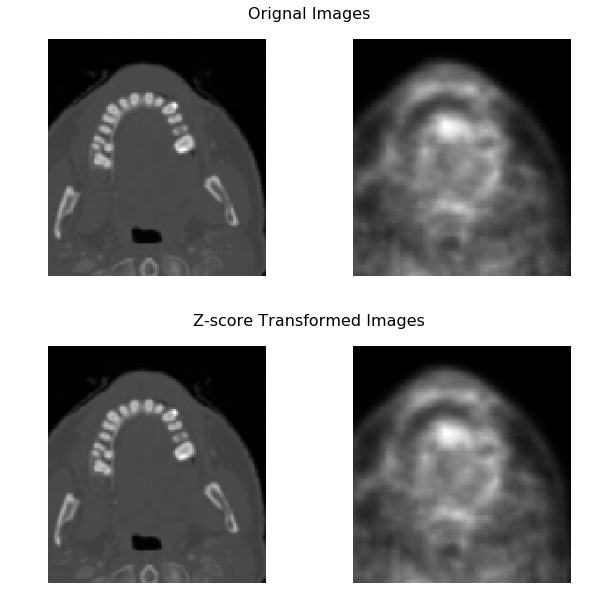

In [13]:
fig, orig_axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

titles = ['Orignal Images', 'Z-score Transformed Images']
for num, orig_axis in enumerate(orig_axes.ravel()):
    orig_axis.set_title(titles[num], fontsize=16, pad=20)
    orig_axis.axis('off')
    
images = [
    ct_image1[:, :, 89], pet_image1[:, :, 89],
    ct_std[:, :, 89], pet_std[:, :, 89]
]
for num, image in enumerate(images):
    axis = fig.add_subplot(2, 2, num + 1)
    axis.imshow(
        images[num], 
        cmap=plt.cm.gray,
        vmin=np.min(images[num]),
        vmax=np.max(images[num])
    )
    axis.axis('off')
    
plt.subplots_adjust(hspace=0.3)

"""
plt.savefig(
    './../../../figures/thesis/z_scoring_pet_ct.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)"""

# Z-scoring and outlier removal

In [14]:
pet_max_outlier = pet_mean + 3 * pet_stdev
pet_min_outlier = pet_mean - 3 * pet_stdev

ct_max_outlier = ct_mean + 3 * ct_stdev
ct_min_outlier = ct_mean - 3 * ct_stdev

pet_removal = np.copy(pet_std)
pet_removal[pet_std > pet_max_outlier] = 0
pet_removal[pet_std < pet_min_outlier] = 0

ct_removal = np.copy(ct_std)
ct_removal[ct_std > ct_max_outlier] = 0
ct_removal[ct_std < ct_min_outlier] = 0

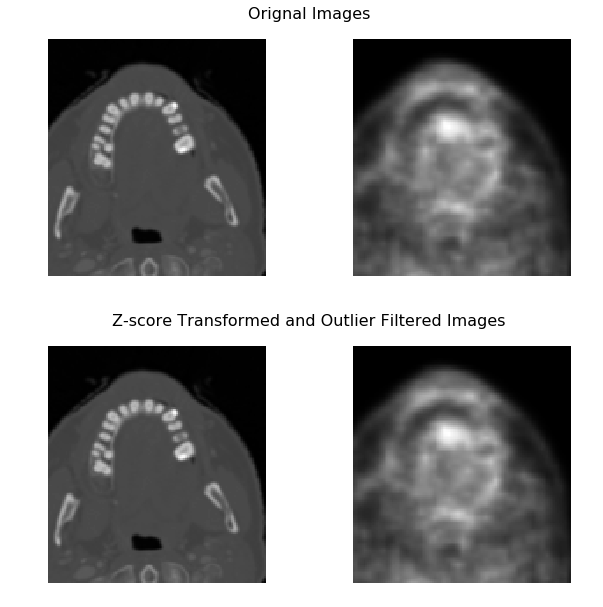

In [15]:
fig, orig_axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

titles = ['Orignal Images', 'Z-score Transformed and Outlier Filtered Images']
for num, orig_axis in enumerate(orig_axes.ravel()):
    orig_axis.set_title(titles[num], fontsize=16, pad=20)
    orig_axis.axis('off')
    
images = [
    ct_image1[:, :, 89], pet_image1[:, :, 89],
    ct_removal[:, :, 89], pet_removal[:, :, 89]
]
for num, image in enumerate(images):
    axis = fig.add_subplot(2, 2, num + 1)
    axis.imshow(
        images[num], 
        cmap=plt.cm.gray,
        vmin=np.min(images[num]),
        vmax=np.max(images[num])
    )
    axis.axis('off')
    
plt.subplots_adjust(hspace=0.3)
   
plt.savefig(
    './../../../figures/thesis/z_scoring_outlier_removal_pet_ct.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

# Outlier inspection

In [ ]:
paths = utils.sample_paths(
    './../../../data_source/images/ct_nrrd/', 
    './../../../data_source/images/masks_nrrd/',
    target_format='nrrd'
)
corrects = 0
for path in paths:
    img_path = path['Image']
    mask_path = path['Mask']
    
    image, _ = nrrd.read(img_path)
    
    image_std = np.std(image)
    image_mean = np.mean(image)
    image_std = (image - image_mean) / image_std

    outlier = 3 * image_std
    if np.any(image_std < outlier - image_mean):
        print('Num CT small outliers: {}'.format(np.sum(image_std < outlier - image_mean)))
        print('of {}'.format(np.size(image)))
    if np.any(image_std > outlier + image_mean):
        print('Num CT large outlies: {}'.format(np.sum(image_std > outlier + image_mean)))
        print('of {}'.format(np.size(image)))
    

In [ ]:
paths = utils.sample_paths(
    './../../../data_source/images/pet_nrrd/', 
    './../../../data_source/images/masks_nrrd/',
    target_format='nrrd'
)
corrects = 0
for path in paths:
    img_path = path['Image']
    mask_path = path['Mask']
    
    image, _ = nrrd.read(img_path)
    
    image_std = np.std(image)
    image_mean = np.mean(image)
    image_std = (image - image_mean) / image_std

    outlier = 3 * image_std
    if np.any(image_std < outlier - image_mean):
        print('Num PET small outliers: {}'.format(np.sum(image_std < outlier - image_mean)))
        print('of {}'.format(np.size(image)))
    if np.any(image_std > outlier + image_mean):
        print('Num PET large outlies: {}'.format(np.sum(image_std > outlier + image_mean)))
        print('of {}'.format(np.size(image)))
    

# Handling outliers

Ref: 
* *Practical guidelines for handling head and neck computed tomography artifacts for quantitative image analysis*.
* *A virtual sinogram method to reduce dental metallic implant artefacts in computed tomography-based attenuation correction for PET*

# Handling streaks

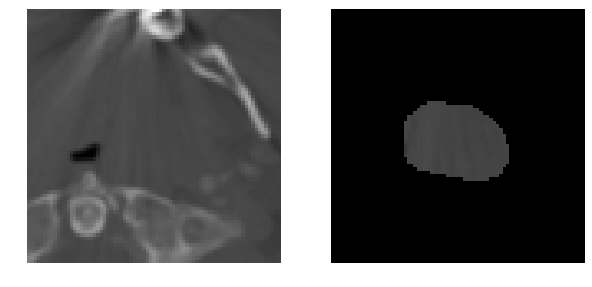

In [34]:
image, _ = nrrd.read('./../../../data_source/images/ct_nrrd/P169CT.nrrd')
mask, _ = nrrd.read('./../../../data_source/images/masks_nrrd/P169mask.nrrd')

masked = image * mask

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

slice_idx = 50
axes[0].imshow(
    image[:, :, slice_idx], 
    cmap=plt.cm.gray
)
axes[1].imshow(
    masked[:, :, slice_idx], 
    cmap=plt.cm.gray, 
    vmin=np.min(image),
    vmax=np.max(image)
)
for axis in axes.ravel():
    axis.axis('off')

(0.0, 180.0, 0.0, 77.0)

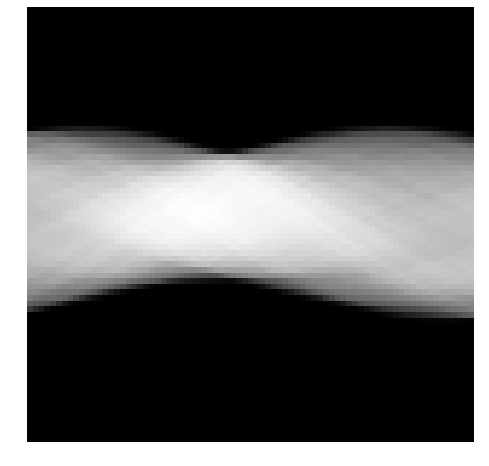

In [35]:
# http://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html

# The inverse Radon transform is used in CT to reconstruct a 2D image from the the sinogram. As the inverse Radon 
# transform reconstructs the object from a set of projections, the forward Radon transform can be used to simulate 
# the tomography experiment.

from skimage.transform import radon

theta = np.linspace(0.0, 180.0, max(masked[:, :, 50].shape), endpoint=False)
sinogram = radon(masked[:, :, 50], theta=theta, circle=True)

plt.figure(figsize=(8, 8))
plt.imshow(
    sinogram, cmap=plt.cm.Greys_r,
    extent=(0, 180, 0, sinogram.shape[0]), aspect='auto'
)
plt.axis('off')

In [36]:
np.max(image), np.min(image)

(4094.812542915999, 0.18745708400091554)

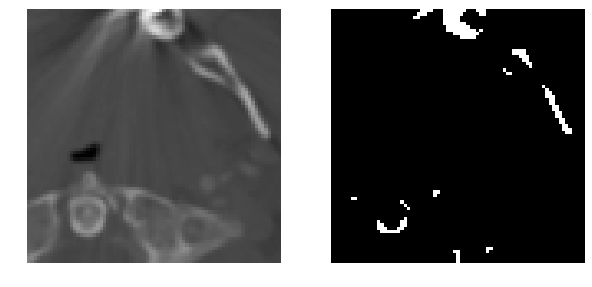

In [37]:
# Metal segmentation.
slice_idx = 50
image = image[:, :, slice_idx]
metal_image = image > 2000

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(
    image, 
    cmap=plt.cm.gray
)
axes[1].imshow(
    metal_free_image, 
    cmap=plt.cm.gray, 
)
for axis in axes.ravel():
    axis.axis('off')

In [42]:
metal_free_image = np.copy(image)
metal_free_image[metal_image > 0] = 0
bg_mean = np.mean(metal_free_image)
bg_mean, np.mean(image)

(1142.4935210859596, 1205.9291058096069)

In [43]:
from skimage.restoration import denoise_nl_means, estimate_sigma

# Estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(metal_free_image, multichannel=True))

# 5x5 patches, 13x13 search area.
patch_kw = dict(
    patch_size=5, patch_distance=6, multichannel=True
)
# Slow algorithm, sigma provided
metal_free_image_denoise = denoise_nl_means(
    metal_free_image, h=0.8 * sigma_est, sigma=sigma_est,
    fast_mode=False, **patch_kw
)

(-0.5, 76.5, 76.5, -0.5)

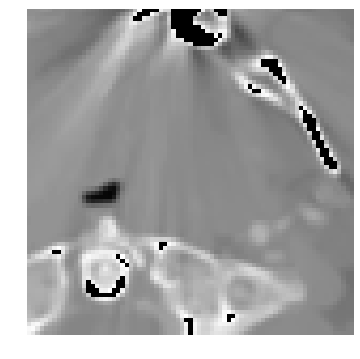

In [45]:
plt.figure(figsize=(6, 6))
plt.imshow(metal_free_image_denoise, cmap=plt.cm.gray)
plt.axis('off')

/Users/severinlangberg/anaconda/lib/python3.6/site-packages/skimage/transform/radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '
/Users/severinlangberg/anaconda/lib/python3.6/site-packages/skimage/transform/radon_transform.py:58: UserWarning: The default of `circle` in `skimage.transform.radon` will change to `True` in version 0.15.
  warn('The default of `circle` in `skimage.transform.radon` '


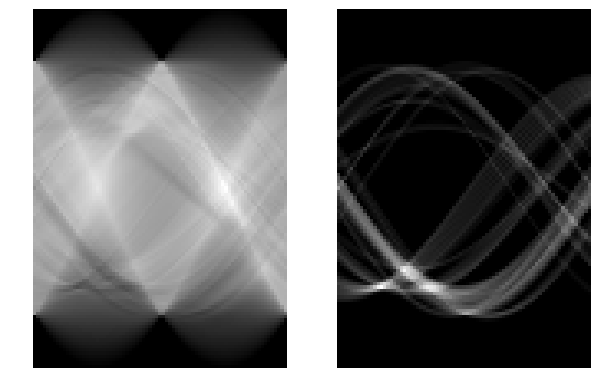

In [47]:
theta = np.linspace(0.0, 180.0, max(metal_free_image_denoise.shape), endpoint=False)
metal_free_sino = radon(metal_free_image_denoise, theta=theta)

theta = np.linspace(0.0, 180.0, max(metal_image.shape), endpoint=False)
metal_sino = radon(metal_image, theta=theta)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(
    metal_free_sino, 
    cmap=plt.cm.gray
)
axes[1].imshow(
    metal_sino, 
    cmap=plt.cm.gray, 
)
for axis in axes.ravel():
    axis.axis('off')

In [49]:
#from scipy.interpolate import interp1d

interpol = interp1d(metal_free_sino, metal_sino)

((109, 77), (109, 77))

In [58]:
filled_metal_bins = np.squeeze(np.where(metal_sino.ravel() != 0))
empty_metal_free_bins = np.squeeze(np.where(metal_free_sino.ravel() == 0))

overlaps = np.squeeze(np.where(np.isin(filled_metal_bins, empty_metal_free_bins)))
overlaps

array([], dtype=int64)

In [ ]:
# https://www.mathworks.com/matlabcentral/fileexchange/34589-created-metal-artifact-of-computed-tomography

# Histogram equalization

* Enhance images with low contrast.
* Use local hist. equal. in images highly impacted by artifacts.

# Re-Segmentation

* Re-segment tumor region to exclude voxels above a certain threshold. 
* Determine threshold by calculating CT intensity from HU range of bone.